# backpropagation and visualization of the neural network weights



In [2]:
import networks
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

In [3]:
# load datasets

data_dir = Path("data")
square_simple_train = pd.read_csv(data_dir / "regression" / "square-simple-training.csv", index_col=0)
square_simple_test = pd.read_csv(data_dir / "regression" / "square-simple-test.csv", index_col=0)
steps_small_train = pd.read_csv(data_dir / "regression" / "steps-small-training.csv", index_col=0)
steps_small_test = pd.read_csv(data_dir / "regression" / "steps-small-test.csv", index_col=0)
multimodal_large_train = pd.read_csv(data_dir / "regression" / "multimodal-large-training.csv")
multimodal_large_test = pd.read_csv(data_dir / "regression" / "multimodal-large-test.csv")


# square simple train

visualisation of neural network weights will be done using a basic barplot

In [4]:
layers = [
    {"output_dim": 2, "activation": "tanh", "init": "normal"},
    {"activation": "linear"}
]

mlp = networks.MLP(layers, input=square_simple_train[["x"]])


In [5]:
mlp.layers[0].weights

array([[0.37454012],
       [0.95071431]])

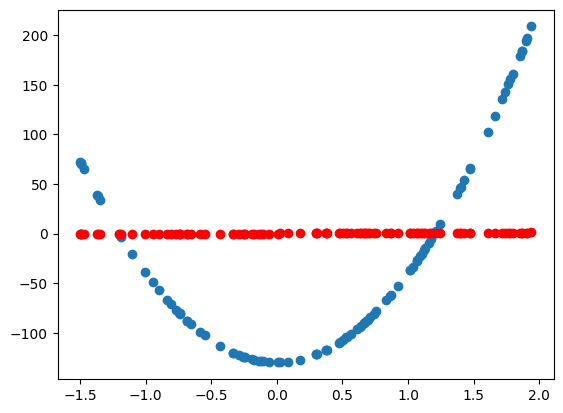

In [6]:
y_hat = mlp.full_forward_pass(square_simple_train[["x"]].T)

plt.scatter(square_simple_train["x"], square_simple_train["y"])
plt.scatter(square_simple_train["x"], y_hat.T, color="red")

In [7]:
mlp.layers[0].weights[:, 0]

array([0.37454012, 0.95071431])

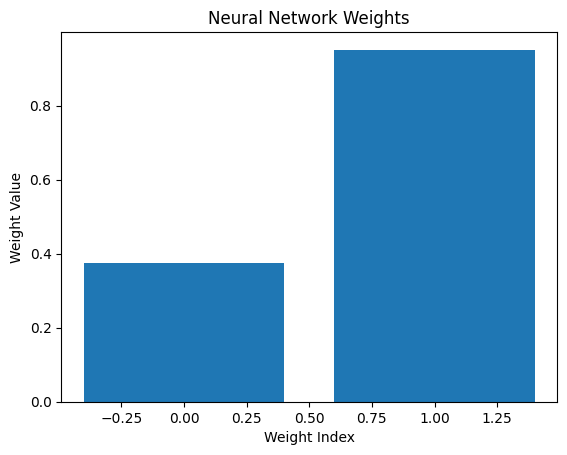

In [8]:
plt.bar(range(len(mlp.layers[0].weights)), mlp.layers[0].weights[:, 0])
plt.xlabel('Weight Index')
plt.ylabel('Weight Value')
plt.title('Neural Network Weights')
plt.show()

In [9]:
dw, db = mlp.full_backward_propagation(square_simple_train[["x"]].T.to_numpy(), square_simple_train[["y"]].T.to_numpy(), verbose=True)
mlp.layers[0].weights -= 0.1 * dw[0]
mlp.layers[1].weights -= 0.1 * dw[1]
mlp.layers[0].bias -= 0.01 * db[0]
mlp.layers[1].bias -= 0.01 * db[1]
#point = mlp.layers[0].weights.reshape(-1)

y_hat:  (1, 100) (1, 100) (1, 100)
g mean:  0.6152469006983121


[3.03681542 1.0550567 ]


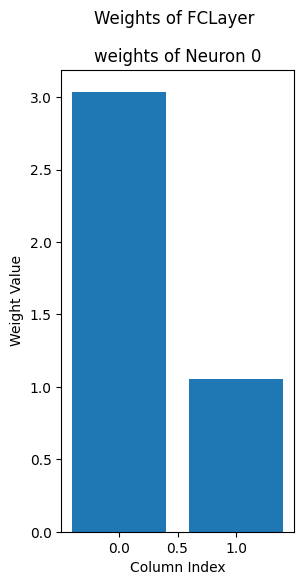

[2.67497589]
[3.41137187]


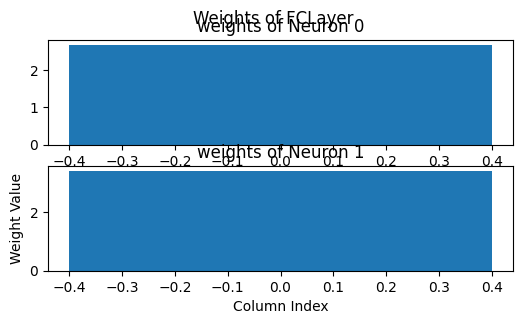

In [10]:
mlp.layers[0].plot_weights()
mlp.layers[1].plot_weights()

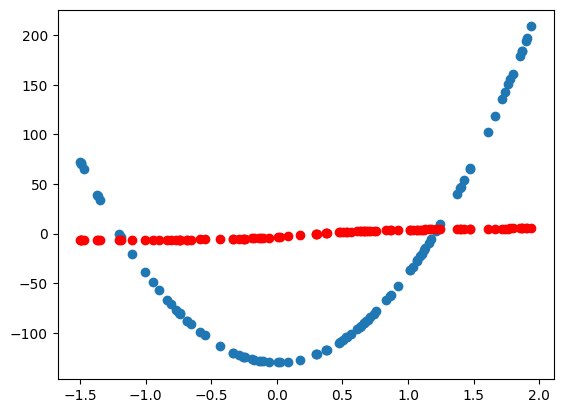

In [11]:
plt.scatter(square_simple_train["x"], square_simple_train["y"])
plt.scatter(square_simple_train["x"], mlp.full_forward_pass(square_simple_train[["x"]].T).T, color="red")

In [27]:
mlp.loss(square_simple_train[["x"]].T.to_numpy(), square_simple_train[["y"]].T.to_numpy())

9837.194038177593

In [22]:
dw, db = mlp.full_backward_propagation(square_simple_train[["x"]].T.to_numpy(), square_simple_train[["y"]].T.to_numpy(), verbose=True)

point = mlp.layers[0].weights

k = 100
x1 = np.linspace(0, 4, k)
x2 = np.linspace(0, 4, k)
X1, X2 = np.meshgrid(x1, x2)
Z = np.zeros_like(X1)

for i in range(k):
    if i % 10 == 0:
        print(f"i = {i}")
    for j in range(k):
        mlp.layers[0].weights = np.array([[X1[i, j]], [X2[i, j]]])
        Z[i, j] = mlp.loss(square_simple_train[["x"]].T, square_simple_train[["y"]].T)


y_hat:  (1, 100) (1, 100) (1, 100)
g mean:  0.6209619567739056
i = 0


i = 10
i = 20
i = 30
i = 40
i = 50
i = 60
i = 70
i = 80
i = 90


In [23]:
dw[0][1][0]
dw

[array([[11.08104782],
        [12.98924017]]),
 array([[-33.45063041, -32.43286315]])]

In [24]:
point

array([[4.],
       [4.]])

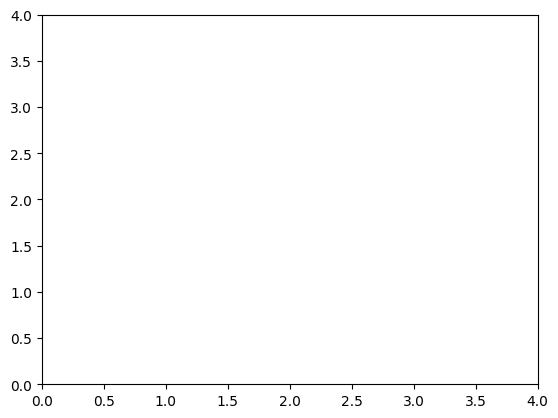

In [26]:
plt.contour(X1, X2, Z, 100)

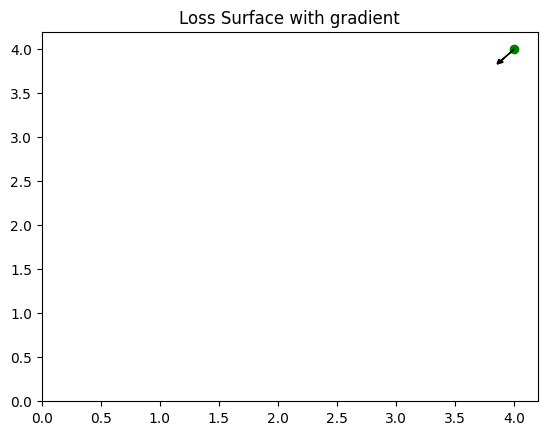

In [25]:



# add dot for self.beta
plt.scatter(point[0], mlp.layers[0].weights[0], c = 'g')
# draw arrow for gradient
plt.arrow(point[0][0], point[1][0], -0.01 * dw[0][0][0], -0.01 * dw[0][1][0], head_width=0.05, head_length=0.05, fc='k', ec='k')
plt.title("Loss Surface with gradient")
plt.show()

[0.15599452]
[0.05808361]
[0.86617615]
[0.60111501]
[0.70807258]


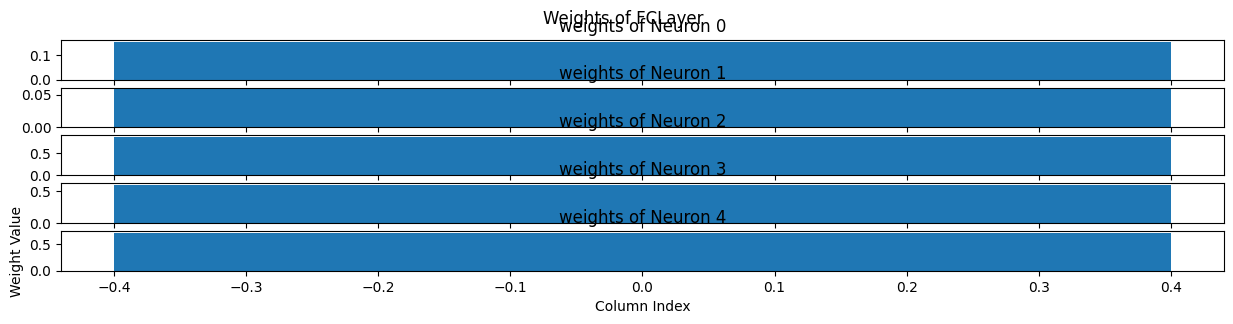

In [8]:
mlp.layers[1].plot_weights()

now we want to calculate the partial derivative over the layers


In [142]:
dw, db = mlp.full_backward_propagation(square_simple_train[["x"]].T.to_numpy(), square_simple_train[["y"]].T.to_numpy())
mlp.layers[0].weights -= 1 * dw[0]
mlp.layers[0].bias -= 1 * db[0]

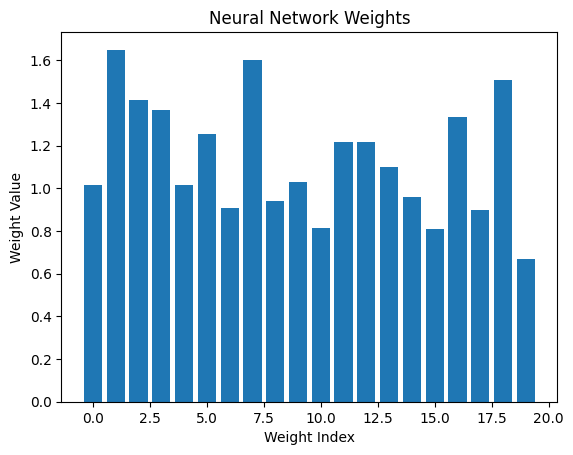

In [143]:
plt.bar(range(len(mlp.layers[0].weights)), mlp.layers[0].weights[:, 0])
plt.xlabel('Weight Index')
plt.ylabel('Weight Value')
plt.title('Neural Network Weights')
plt.show()

In [29]:
norm = networks.assets.Normalizator(square_simple_train)

square_simple_train_norm = norm(square_simple_train)
square_simple_test_norm = norm(square_simple_test)

In [30]:
dw, db = mlp.full_backward_propagation(square_simple_train_norm[["x"]].T.to_numpy(), square_simple_train_norm[["y"]].T.to_numpy())
print([dw[i].mean() for i in range(len(dw))])

[-0.2612061228891449, -0.08976172414190346]


Epoch: 0, Loss: 0.7738383732205145
Epoch: 100, Loss: 0.12910666743720647
Epoch: 200, Loss: 0.053959265137884876
Epoch: 300, Loss: 0.029894667285360485
Epoch: 400, Loss: 0.017999985857428534
Epoch: 500, Loss: 0.011668572460835157
Epoch: 600, Loss: 0.008078939705775078
Epoch: 700, Loss: 0.005919224492719485
Epoch: 800, Loss: 0.004553079149817687
Epoch: 900, Loss: 0.0036528262346918134
Epoch: 1000, Loss: 0.0030390662497577887
Epoch: 1100, Loss: 0.002608192127398629
Epoch: 1200, Loss: 0.0022976876518502752
Epoch: 1300, Loss: 0.002068463753103775
Epoch: 1400, Loss: 0.001895355129495733
Epoch: 1500, Loss: 0.0017617604473758833
Epoch: 1600, Loss: 0.0016564977814989058
Epoch: 1700, Loss: 0.001571897666013268
Epoch: 1800, Loss: 0.0015026139268003904
Epoch: 1900, Loss: 0.0014448643091511135
Epoch: 2000, Loss: 0.0013959356085010907


Epoch: 2100, Loss: 0.0013538554751896306
Epoch: 2200, Loss: 0.0013171714200390478
Epoch: 2300, Loss: 0.0012848000057212056
Epoch: 2400, Loss: 0.0012559227059328244
Epoch: 2500, Loss: 0.001229913216385412
Epoch: 2600, Loss: 0.0012062862149600534
Epoch: 2700, Loss: 0.0011846609031792336
Epoch: 2800, Loss: 0.0011647348296287255
Epoch: 2900, Loss: 0.0011462649266814197
Epoch: 3000, Loss: 0.0011290536479869244
Epoch: 3100, Loss: 0.0011129387403267744
Epoch: 3200, Loss: 0.0010977856243691215
Epoch: 3300, Loss: 0.0010834816623190003
Epoch: 3400, Loss: 0.0010699318008623262
Epoch: 3500, Loss: 0.0010570552246360841
Epoch: 3600, Loss: 0.0010447827585311578
Epoch: 3700, Loss: 0.0010330548298810973
Epoch: 3800, Loss: 0.0010218198531985008
Epoch: 3900, Loss: 0.0010110329369193939
Epoch: 4000, Loss: 0.0010006548379921636
Epoch: 4100, Loss: 0.000990651109157157
Epoch: 4200, Loss: 0.0009809913975442504
Epoch: 4300, Loss: 0.0009716488632705017
Epoch: 4400, Loss: 0.0009625996941070061
Epoch: 4500, Loss:

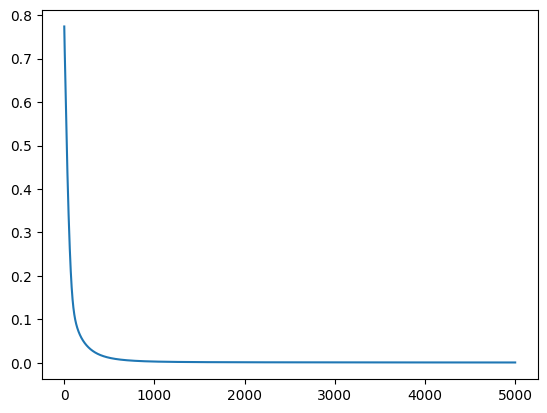

In [31]:
mlp = networks.MLP(layers, input=square_simple_train[["x"]])

losses = mlp.train(square_simple_train_norm[["x"]].T.to_numpy(), square_simple_train_norm[["y"]].T.to_numpy(), learning_rate=0.1, max_epochs=5000, batch_size=1000)

plt.plot(losses)

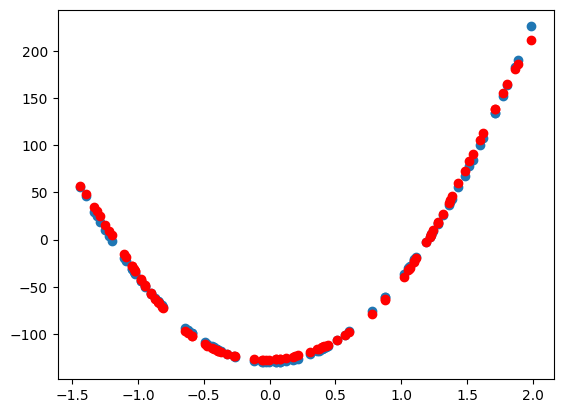

In [34]:
y_hat = mlp.full_forward_pass(square_simple_test_norm[["x"]].T)

plt.scatter(square_simple_test["x"], square_simple_test["y"])
plt.scatter(square_simple_test["x"], norm.denorm(y_hat.T, index="y"), color="red")

In [35]:
square_simple_test_norm["y"].shape
y_hat.shape


(1, 100)

In [45]:
norm.denorm(y_hat.T, index="y").to_numpy().flatten()

array([ -41.84331686,    9.60616835, -125.1549809 ,    5.82235674,
        -29.63331674,   39.26709513,  -56.48054267,  164.42794872,
       -112.20561009,  -42.28149413,  -39.3370284 , -118.97875077,
          5.35504413, -126.57671517,  -63.95256135,    2.87256277,
        -67.43956496,   48.26548852,  -32.7350533 ,  -63.09544536,
        154.83565444, -112.09141145,  -97.58775585,  -72.71264044,
       -115.36646773,  -62.41082199, -125.98220108, -117.62385038,
        -18.17212437,  -66.38847514,  -32.29681263, -126.98659474,
       -127.00074598, -123.67569295, -126.91044154,  -33.30022542,
         46.21339238, -100.69770262,   18.69340973,   -2.68845856,
        138.32504853,   82.95327329, -117.60812135, -101.50369374,
        -23.34185688,  -19.56978825,  138.1737988 ,   17.64001429,
        -30.9926351 , -110.61734636,  -71.39791422,    9.82105866,
        -27.70698538,  -27.8678403 ,   15.83186725,   30.51083554,
       -116.02889125,  -15.22539728,  -22.66540233,  -31.19020

In [43]:
square_simple_test["y"].shape

(100,)

In [46]:
mse = np.mean((square_simple_test["y"] - norm.denorm(y_hat.T, index="y").to_numpy().flatten())**2)
mse

10.140087392350882

In [47]:
weights = mlp.layers[0].weights

weights

array([[1.46489899],
       [1.09519608]])

more layers

In [51]:
layers = [
    {"output_dim": 10, "activation": "sigmoid", "init": "uniform"},
    {"output_dim": 5, "activation": "sigmoid", "init": "uniform"},
    {"activation": "linear"}
]

norm = networks.assets.Normalizator(square_simple_train)

square_simple_train_norm = norm(square_simple_train)
square_simple_test_norm = norm(square_simple_test)

mlp = networks.MLP(layers, input=square_simple_train_norm[["x"]])

In [55]:
losses = mlp.train(square_simple_train_norm[["x"]].T.to_numpy(), square_simple_train_norm[["y"]].T.to_numpy(), learning_rate=0.02, loss_stop=1e-10, max_epochs=50000, batch_size=500)

Epoch: 0, Loss: 0.0011686091945559808
Epoch: 100, Loss: 0.0011648492184837404
Epoch: 200, Loss: 0.0011611477819393505
Epoch: 300, Loss: 0.001157503081646377
Epoch: 400, Loss: 0.001153913384303948
Epoch: 500, Loss: 0.0011503770236428322
Epoch: 600, Loss: 0.0011468923976114638
Epoch: 700, Loss: 0.0011434579656856502
Epoch: 800, Loss: 0.0011400722462963867
Epoch: 900, Loss: 0.001136733814370345
Epoch: 1000, Loss: 0.00113344129897775
Epoch: 1100, Loss: 0.0011301933810828472
Epoch: 1200, Loss: 0.0011269887913922633
Epoch: 1300, Loss: 0.0011238263082967862
Epoch: 1400, Loss: 0.0011207047559023426
Epoch: 1500, Loss: 0.0011176230021461122
Epoch: 1600, Loss: 0.0011145799569939898
Epoch: 1700, Loss: 0.0011115745707156726
Epoch: 1800, Loss: 0.001108605832233948
Epoch: 1900, Loss: 0.0011056727675448036


Epoch: 2000, Loss: 0.0011027744382052372
Epoch: 2100, Loss: 0.001099909939885691
Epoch: 2200, Loss: 0.0010970784009843573
Epoch: 2300, Loss: 0.0010942789813004259
Epoch: 2400, Loss: 0.0010915108707638616
Epoch: 2500, Loss: 0.0010887732882190206
Epoch: 2600, Loss: 0.0010860654802599345
Epoch: 2700, Loss: 0.001083386720114777
Epoch: 2800, Loss: 0.001080736306577524
Epoch: 2900, Loss: 0.0010781135629846954
Epoch: 3000, Loss: 0.0010755178362351011
Epoch: 3100, Loss: 0.0010729484958508554
Epoch: 3200, Loss: 0.001070404933077824
Epoch: 3300, Loss: 0.0010678865600237202
Epoch: 3400, Loss: 0.001065392808832291
Epoch: 3500, Loss: 0.0010629231308920185
Epoch: 3600, Loss: 0.0010604769960777976
Epoch: 3700, Loss: 0.0010580538920242151
Epoch: 3800, Loss: 0.0010556533234290797
Epoch: 3900, Loss: 0.0010532748113858108
Epoch: 4000, Loss: 0.0010509178927435667
Epoch: 4100, Loss: 0.0010485821194938527
Epoch: 4200, Loss: 0.0010462670581824715
Epoch: 4300, Loss: 0.0010439722893457336
Epoch: 4400, Loss: 0.

MSE on test data:  7.219779879132175


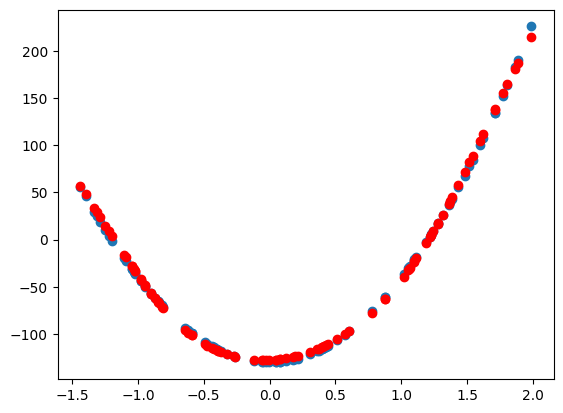

In [56]:
y_hat = mlp.full_forward_pass(square_simple_test_norm[["x"]].T).to_numpy()

y_hat_denorm = norm.denorm(y_hat.T, index="y").flatten()
plt.scatter(square_simple_test["x"], square_simple_test["y"])
plt.scatter(square_simple_test["x"], y_hat_denorm, color="red")

mse = np.mean((square_simple_test["y"] - y_hat_denorm)**2)
print("MSE on test data: ", mse)

thats enough small MSE

## steps small 

In [57]:
layers = [
    {"output_dim": 10, "activation": "relu", "init_method": "he"},
    #{"output_dim": 3, "activation": "relu", "init_method": "he"},
    {"output_dim": 3, "activation": "relu", "init_method": "he"},
    {"output_dim": 5, "activation": "sigmoid", "init_method": "uniform"},

    {"activation": "linear"}
]



norm_steps = networks.assets.Normalizator(steps_small_train)
steps_small_train_norm = norm_steps(steps_small_train)
steps_small_test_norm = norm_steps(steps_small_test)

mlp_steps = networks.MLP(layers, input=steps_small_train_norm[["x"]])


In [58]:
steps_small_train_norm[["x"]].T.to_numpy().shape[1]

50

Epoch: 0, Loss: 0.8429459147982654
Epoch: 100, Loss: 0.19471614448956015
Epoch: 200, Loss: 0.17742377994615283
Epoch: 300, Loss: 0.08873573028194562
Epoch: 400, Loss: 0.06922057286094692
Epoch: 500, Loss: 0.0647203097603882
Epoch: 600, Loss: 0.061367406737003735
Epoch: 700, Loss: 0.05793362750715805
Epoch: 800, Loss: 0.05441923978025429
Epoch: 900, Loss: 0.0512016379253569
Epoch: 1000, Loss: 0.048585173579775834


Epoch: 1100, Loss: 0.046533115380255105
Epoch: 1200, Loss: 0.044971772090718565
Epoch: 1300, Loss: 0.04377720255148769
Epoch: 1400, Loss: 0.04286227376219334
Epoch: 1500, Loss: 0.04212846425796071
Epoch: 1600, Loss: 0.04152906972752077
Epoch: 1700, Loss: 0.04107376081787176
Epoch: 1800, Loss: 0.04515194095655855
Epoch: 1900, Loss: 0.042469954542534404
Epoch: 2000, Loss: 0.04264709909856392
Epoch: 2100, Loss: 0.04194043046317975
Epoch: 2200, Loss: 0.04150464502264965
Epoch: 2300, Loss: 0.04105811956336083
Epoch: 2400, Loss: 0.040737968028906064
Epoch: 2500, Loss: 0.040410010566767414
Epoch: 2600, Loss: 0.04008958876585409
Epoch: 2700, Loss: 0.04039116672258181
Epoch: 2800, Loss: 0.03967000769305615
Epoch: 2900, Loss: 0.03941417025070816
Epoch: 3000, Loss: 0.039141362955061446
Epoch: 3100, Loss: 0.03772875244988637
Epoch: 3200, Loss: 0.03885643869867392
Epoch: 3300, Loss: 0.03847992194180038
Epoch: 3400, Loss: 0.03807419444798932
Epoch: 3500, Loss: 0.037900890259957076
Epoch: 3600, Loss:

Text(0.5, 1.0, 'Training Loss')

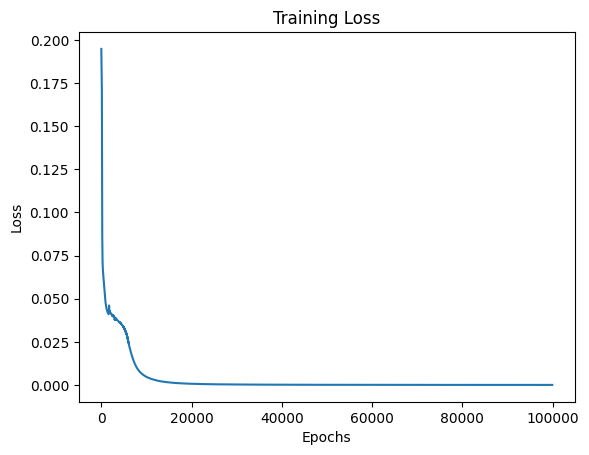

In [60]:
mlp_steps = networks.MLP(layers, input=steps_small_train_norm[["x"]])


losses = mlp_steps.train(steps_small_train_norm[["x"]].T.to_numpy(), steps_small_train_norm[["y"]].T.to_numpy(), 
                         max_epochs=100000, learning_rate = 0.1, batch_size=500)
# losses = mlp_steps.minibatch_train(steps_small_train_norm[["x"]].T.to_numpy(), steps_small_train_norm[["y"]].T.to_numpy(), 0.1, 20000)

plt.plot(losses[100:])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')

MSE on train data:  0.380708579085416


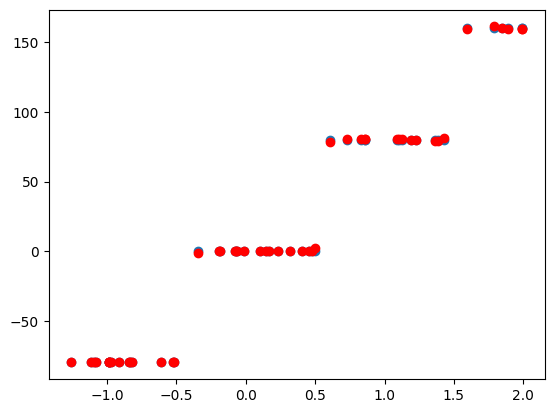

In [26]:
y_hat = mlp_steps.full_forward_pass(steps_small_train_norm[["x"]].T)

plt.scatter(steps_small_train["x"], steps_small_train["y"])
plt.scatter(steps_small_train["x"], norm_steps.denorm(y_hat.T, index="y"), color="red")

mse = np.mean((steps_small_train["y"] - norm_steps.denorm(y_hat.T, index="y").flatten())**2)
print("MSE on train data: ", mse)

MSE on test data:  64.75998892030675


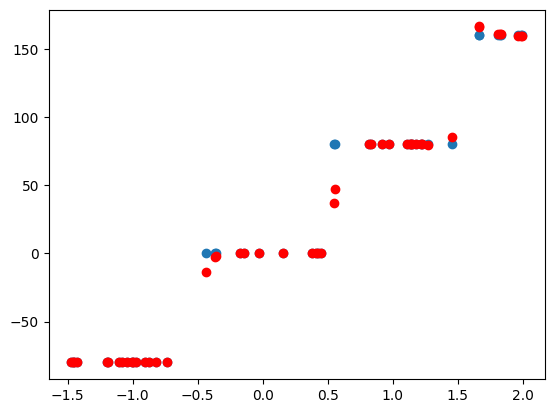

In [27]:
y_hat = mlp_steps.full_forward_pass(steps_small_test_norm[["x"]].T)

plt.scatter(steps_small_test["x"], steps_small_test["y"])
plt.scatter(steps_small_test["x"], norm_steps.denorm(y_hat.T, index="y"), color="red")

mse = np.mean((steps_small_test["y"] - norm_steps.denorm(y_hat.T, index="y").flatten())**2)
print("MSE on test data: ", mse)

In [17]:
import pickle
# Specify the file path where you want to save the pickle file
file_path = "steps_weights.pkl"

# Save the weights_global variable as a pickle file
with open(file_path, "rb") as file:
    weights_global = pickle.load(file)

for i in range(len(mlp_steps.layers)):
    print("Layer ", i)
    print("Weights: ", weights_global[i][0].shape)
    print("Biases: ", weights_global[i][1].shape)
    mlp_steps.layers[i].weights = weights_global[i][0]
    mlp_steps.layers[i].biases = weights_global[i][1]

FileNotFoundError: [Errno 2] No such file or directory: 'steps_weights.pkl'

MSE on test data:  58836.411861522254


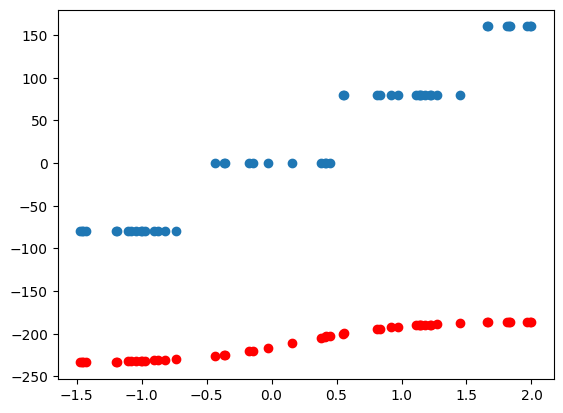

In [34]:
y_hat = mlp_steps.full_forward_pass(steps_small_test_norm[["x"]].T)

plt.scatter(steps_small_test["x"], steps_small_test["y"])
plt.scatter(steps_small_test["x"], norm_steps.denorm(y_hat.T, index="y"), color="red")

mse = np.mean((steps_small_test["y"] - norm_steps.denorm(y_hat.T, index="y").flatten())**2)
print("MSE on test data: ", mse)

# Multimodal large

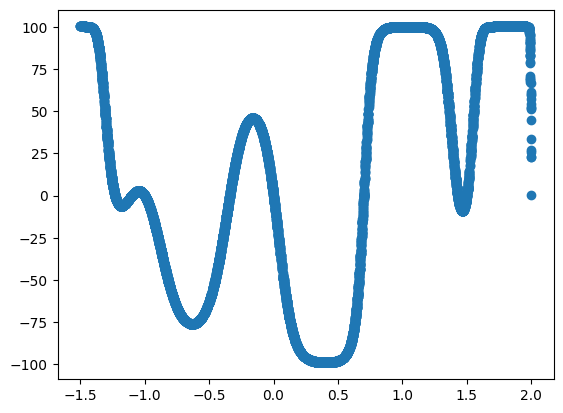

In [28]:

norm_multimodal = networks.assets.Normalizator(multimodal_large_train)

multimodal_large_train_norm = norm_multimodal(multimodal_large_train)
multimodal_large_test_norm = norm_multimodal(multimodal_large_test)

plt.scatter(multimodal_large_train["x"], multimodal_large_train["y"])

In [113]:
multimodal_large_train_norm.std()

x    1.0
y    1.0
dtype: float64

Epoch: 0, Loss: 21.59035337411661
Epoch: 100, Loss: 14.737203479560725
Epoch: 200, Loss: 10.67116696321184
Epoch: 300, Loss: 8.0907315950145
Epoch: 400, Loss: 6.36069693731638
Epoch: 500, Loss: 5.1496998596620145
Epoch: 600, Loss: 4.272415176405903
Epoch: 700, Loss: 3.6190127144001987
Epoch: 800, Loss: 3.1211781891899535
Epoch: 900, Loss: 2.734656420849969


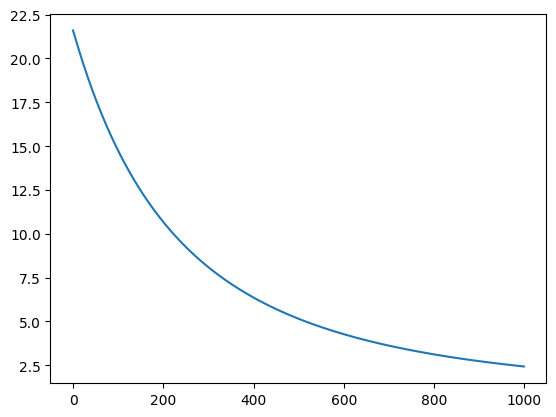

In [127]:
layers = [
    {"output_dim": 20, "activation": "sigmoid", "init_method": "uniform"},
    #{"output_dim": 20, "activation": "relu", "init_method": "he"},
    {"activation": "linear"}
]



mlp_multimodal = networks.MLP(layers, input=multimodal_large_train_norm[["x"]])


losses = mlp_multimodal.train(multimodal_large_train_norm[["x"]].T.to_numpy(), multimodal_large_train_norm[["y"]].T.to_numpy(), max_epochs=1000, batch_size=1000, loss_stop = 1e-8, learning_rate=0.1, momentum=True, momentum_decay=0.5)

plt.plot(losses)

In [56]:
losses = mlp_multimodal.train(multimodal_large_train_norm[["x"]].T.to_numpy(), multimodal_large_train_norm[["y"]].T.to_numpy(), max_epochs=1000, batch_size=500, loss_stop = 1e-8, learning_rate=0.002)


Epoch: 0, Loss: 0.9283112982850671
Epoch: 100, Loss: 0.9283045911794073
Epoch: 200, Loss: 0.9282978867025576
Epoch: 300, Loss: 0.9282911778579661
Epoch: 400, Loss: 0.9282844688572488
Epoch: 500, Loss: 0.9282777538715452
Epoch: 600, Loss: 0.9282710455626578
Epoch: 700, Loss: 0.9282643388148066
Epoch: 800, Loss: 0.9282576365789027
Epoch: 900, Loss: 0.928250925551355


Text(0.5, 1.0, 'Training Loss')

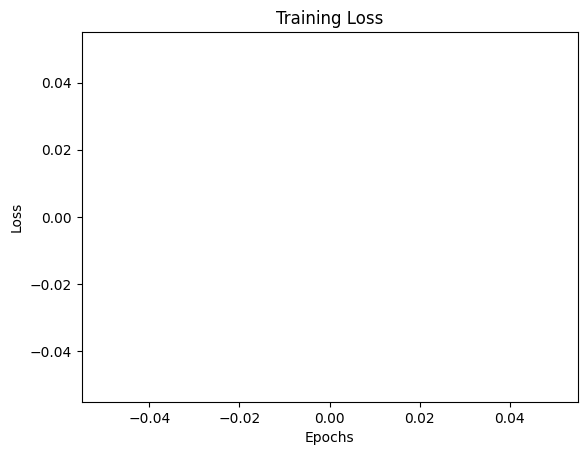

In [45]:
plt.plot(losses[5000:])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')

MSE on test data:  12567.367242848099


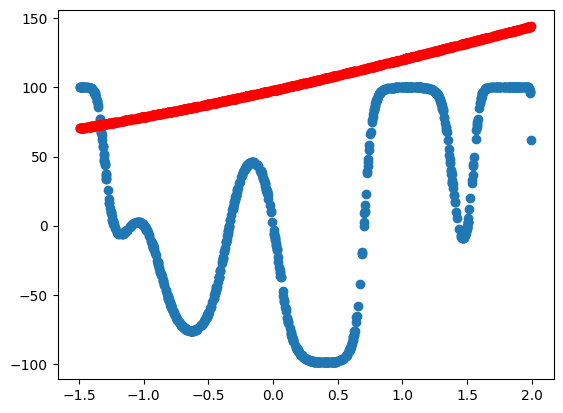

In [128]:
y_hat = mlp_multimodal.full_forward_pass(multimodal_large_test_norm[["x"]].T)

plt.scatter(multimodal_large_test["x"], multimodal_large_test["y"])
plt.scatter(multimodal_large_test["x"], norm_multimodal.denorm(y_hat.T, index="y"), color="red")

mse = np.mean((multimodal_large_test["y"] - norm_multimodal.denorm(y_hat.T, index="y").flatten())**2)
print("MSE on test data: ", mse)